# Outlier 2022, Review in Charts

The beginning of a new year is a natural moment to look forward to things to come and also to reflect on the past, since the past exerts influence on the future.

What has been going on with Outlier in the past 12 months? Some have already put together their summaries. The first is from the inside: Abe's annual [Year in Fabrics](https://www.reddit.com/r/Outlier/comments/102dx05/2022_the_year_in_fabrics/).

And a few from the community:

* [MVP 2022](https://www.reddit.com/r/Outlier/comments/ztts8f/what_was_your_most_valued_piece_mvp_2022/)
* [2022 Outlier pick ups](https://www.reddit.com/r/Outlier/comments/zv1ucz/2022_outlier_pick_ups/)
* [MVP December 2022 and Product of the Year 2022](https://www.reddit.com/r/Outlier/comments/100r6a1/mvp_december_2022_and_product_of_the_year_2022/)

This is mine, Outlier 2022 in charts.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils, plots

import pandas as pd
import numpy as np
import scipy
import os
import os.path
from IPython.display import display, HTML, Markdown
import utils
import plots
import altair as alt

alt.renderers.enable('mimetype')


year = 2022
df_all = utils.outlier_df('../../outlier-data.csv', year)
# df_all = utils.outlier_df('../../../outlier/public/outlier-data.csv', year)

# rel = df_all.iloc[0]['Release'].to_pydatetime()
# text = f"""<p><i>(Provisional analysis of Outlier {year} drops up to {rel.strftime("%b %d, %Y")})</i></p>"""
# display(HTML(text))

**Contents**
* _The Rundown_
* _Re-ups_
* _Colors_
* _Fabrics_

In [2]:
# Filter to Clothes
def type_to_kind(drop_type):
    if drop_type == "T-Shirt" or drop_type == "Shirt" or drop_type == "Tank Top":
        return "Top"
    if drop_type == "Pants" or drop_type == "Shorts":
        return "Bottom"
    return "Layer"


def row_to_subkind(row):
    drop_type = row['Type']
    if drop_type == "T-Shirt" or drop_type == "Shirt":
        pass
    elif drop_type == "Pants" or drop_type == "Shorts":
        pass
    elif drop_type == "Tank Top":
        drop_type = 'T-Shirt'
    else:
        drop_type = "Layer"
    exp = "Exp" if row['Exp'] else "Regular"
    return "{}/{}".format(drop_type, exp)


def object_type_to_kind(drop_type):
    if drop_type == "Backpack" or drop_type == "Bag" or drop_type == "Dopp Kit" \
       or drop_type == "Dufflebag" or drop_type == "Pouch":
        return "Bag"
    if drop_type == "Balaclava" or drop_type == "Bandana" or drop_type == "Scarf":
        return "Scarf/Bandana"
    if drop_type == "Cap" or drop_type == "Hat" or drop_type == "Hood":
        return "Headgear"
    if drop_type == "Bathrobe" or drop_type == "Robe" or drop_type == "Towel" \
       or drop_type == "Outerwear" or drop_type == "Keychain" or drop_type == "Socks":
        return "Misc"
    if drop_type == "Mask" or drop_type == "Belt":
        return drop_type     
    return "Misc"


def drops_to_clothes_drops(df):
    df_clothes = pd.DataFrame(df.loc[df['Category'] == 'Clothes', :])
    df_clothes['Type'] = df_clothes['Type'].replace({'Sweatshirt':'Sweater'})
    df_clothes["Kind"] = df_clothes['Type'].apply(type_to_kind)
    df_clothes["Subkind"] = df_clothes.apply(row_to_subkind, axis=1)
    return df_clothes


# Define some reused frames
all_products_df = utils.drops_to_products(df_all, ['Year', 'Product'], year)
df_all['ColorCount'] = df_all['Colors'].str.split(',').dropna().apply(lambda d: len(d))

df_clothes = drops_to_clothes_drops(df_all)
clothes_products_df = utils.drops_to_products(df_clothes, ['Year', 'Product', 'Kind'], year)

df_objects = pd.DataFrame(df_all.loc[df_all['Category'] == 'Objects', :])
df_objects["Kind"] = df_objects['Type'].apply(object_type_to_kind)
objects_products_df = utils.drops_to_products(df_objects, ['Year', 'Product', 'Kind'], year)


kind_sort_order = ['Bottom', 'Top', 'Layer']
object_kind_sort_order = ['Bag', 'Mask', 'Scarf/Bandana', 'Headgear', 'Belt', 'Other']
year_sort = list(range(year, 2012, -1))
recent_year_sort = list(range(year, 2017, -1))
adjusted_price_col = f"Price-{year}"

In [3]:
ytd_dt = df_all.iloc[0]['Release']
ytd_mask = (df_all['Release'].dt.month < ytd_dt.month) | (
    (df_all['Release'].dt.month == ytd_dt.month) &
    (df_all['Release'].dt.day <= ytd_dt.day))
ytd_df = df_all.loc[ytd_mask]
# ytd_df.head()

# *The Rundown*

As always, we start with the rundown of the usual questions.

- How many drops and products were there?
- Is Outlier getting more expensive?

# How many drops and products were there?

I think we can say that Outlier is back to around where they were pre-pandemic. The **number of drops** is lower than the 2016-2019 average, but it looks like things were headed that way even without the pandemic: _fewer, but larger drops._

The **number of products** has returned back to 2016-2019 levels; Outlier seems to be firing on all cylinders again, though the new normal might not exactly be where the 2019 trajectory was headed before COVID intervened.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


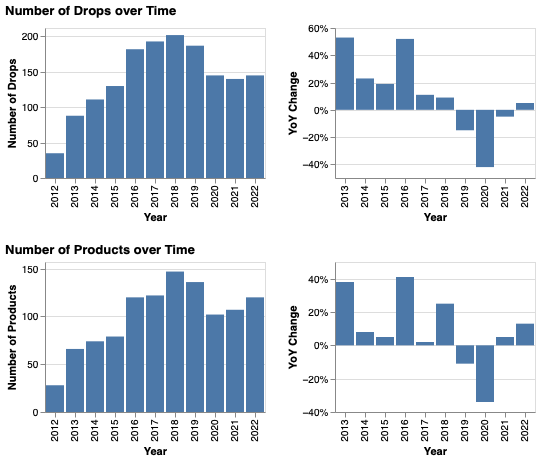

In [4]:
rel_per_year_df = pd.DataFrame(df_all.groupby('Year').count()['Product'])
prod_per_year_df = pd.DataFrame(all_products_df.groupby('Year').count()['Release']
)

(plots.plot_with_yoy(rel_per_year_df, 'Product', 'Drops').properties(title='Number of Drops over Time') 
& plots.plot_with_yoy(prod_per_year_df, 'Release', 'Products').properties(title='Number of Products over Time') )

In [5]:
# # YTD version
# ytd_all_products_df = utils.drops_to_products(ytd_df, ['Year', 'Product'], year)
# rel_per_year_df = pd.DataFrame(ytd_df.groupby('Year').count()['Product'])
# prod_per_year_df = pd.DataFrame(ytd_all_products_df.groupby('Year').count()['Release']
# )

# (plots.plot_with_yoy(rel_per_year_df, 'Product', 'Drops').properties(title=f"Number of Drops by Year up to {rel.strftime('%b %d')}") 
# & plots.plot_with_yoy(prod_per_year_df, 'Release', 'Products').properties(title=f"Number of Products by up to {rel.strftime('%b %d')}"))

## Products by category: the fading layers

To get some more detail on the story, we will look at products and drops, broken down into finer-grained categories, starting with the **products by category**.

Here, we see that the number of clothes products released by Outlier is back to the pre-pandemic levels.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


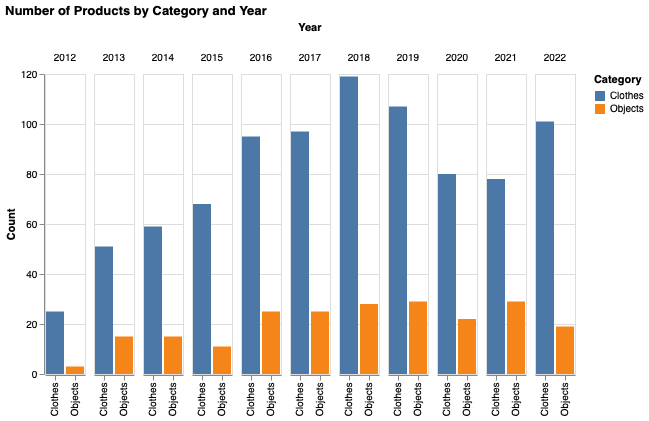

In [6]:
tdf = all_products_df.groupby(['Category', 'Year']).count()['Release'].reset_index()
# tdf = ytd_df.groupby(['Category', 'Year']).count()['Release'].reset_index()
tdf.columns = ['Category', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Category:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Category:N', sort=kind_sort_order),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title=f"Number of Products by Category and Year")

In [7]:
# # YTD
# # tdf = df_all.groupby(['Category', 'Year']).count()['Release'].reset_index()
# tdf = ytd_all_products_df.groupby(['Category', 'Year']).count()['Release'].reset_index()
# tdf.columns = ['Category', 'Year', 'Count']
# alt.Chart(tdf, width=40).mark_bar().encode(
#     x=alt.X('Category:N', sort=kind_sort_order, title=None),
#     y='Count:Q',
#     color=alt.Color('Category:N', sort=kind_sort_order),
#     column='Year:O',
#     tooltip=['Count', ]
# ).configure_facet(spacing=7).properties(title=f"Number of Products by Category and Year up to {rel.strftime('%b %d')}")

Ignoring the objects and focusing on just the clothes, we can see some trends at a more specific level: **bottoms and tops** are back to pre-pandemic levels: there were a larger number of bottoms released in 2022 than in any previous year, and the same for tops, excepting 2018. But **layers** have noticably declined in importance.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


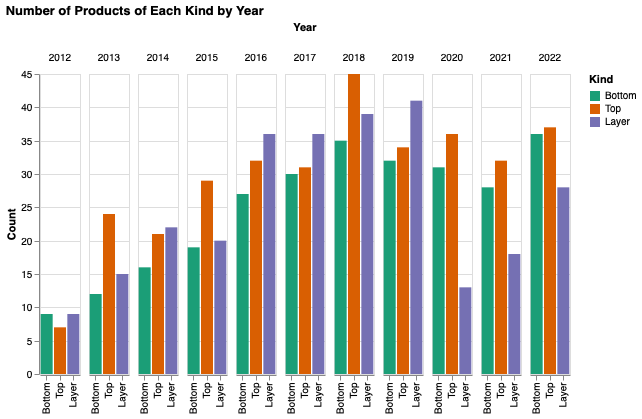

In [8]:
tdf = clothes_products_df.groupby(['Kind', 'Year']).count()['Release'].reset_index()
tdf.columns = ['Kind', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Kind:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Kind:N', sort=kind_sort_order, scale=alt.Scale(scheme='dark2')),
    column='Year:O',
    tooltip=['Count', 'Kind']
).configure_facet(spacing=7).properties(title=f"Number of Products of Each Kind by Year")

In [9]:
# # YTD
# # tdf = clothes_products_df.groupby(['Kind', 'Year']).count()['Release'].reset_index()
# tdf = drops_to_clothes_drops(ytd_df)
# ytd_clothes_products_df = utils.drops_to_products(tdf, ['Year', 'Product', 'Kind'], year)
# tdf = ytd_clothes_products_df.groupby(['Kind', 'Year']).count()['Release'].reset_index()
# ytd_clothes_products_df
# tdf = ytd_clothes_products_df.groupby(['Kind', 'Year']).count()['Release'].reset_index()
# tdf.columns = ['Kind', 'Year', 'Count']
# alt.Chart(tdf, width=40).mark_bar().encode(
#     x=alt.X('Kind:N', sort=kind_sort_order, title=None),
#     y='Count:Q',
#     color=alt.Color('Kind:N', sort=kind_sort_order),
#     column='Year:O',
#     tooltip=['Count', 'Kind']
# ).configure_facet(spacing=7).properties(title=f"Number of Products of Each Kind by Year up to {rel.strftime('%b %d')}")

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


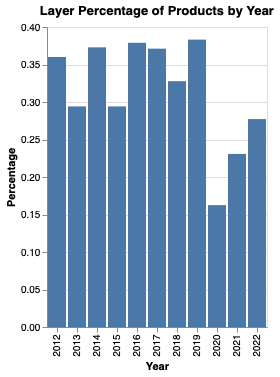

In [10]:
tdf = clothes_products_df.groupby(['Kind', 'Year']).count()['Release'].reset_index()
tdf.columns = ['Kind', 'Year', 'Count']
tdf = tdf.set_index(['Kind', 'Year'])
tdf = tdf / tdf.groupby('Year').sum(True)
tdf.columns = ['Percentage']
alt.Chart(tdf.loc['Layer'].reset_index()).mark_bar().encode(
    x=alt.X('Year:N'),
    y='Percentage:Q',
    tooltip=['Year', 'Percentage']
).properties(title=f"Layer Percentage of Products by Year")

## Drops breakdown by quarter

And finally, a at a breakdown of drops by quarter, where another trend seems to be developing. In the past, Q4 was noticeably the biggest quarter in terms of drops. But this year, drops were pretty evenly distributed over Qs 2, 3, and 4 (Q1 has generally been smaller than other quarters and this year was not an exception in this regard).

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


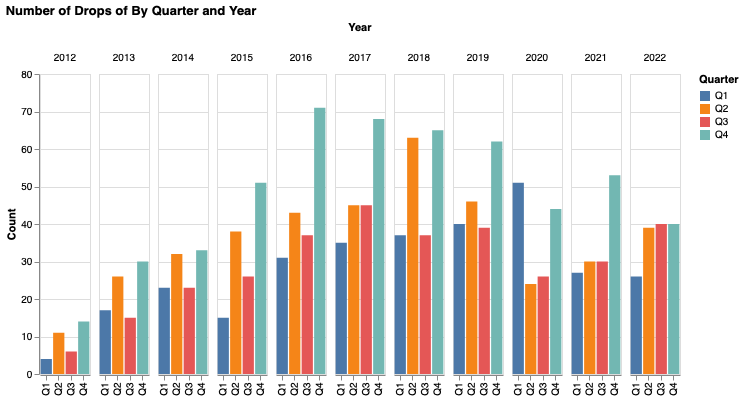

In [11]:
tdf = df_all.groupby(['Quarter', 'Year']).count()['Release'].reset_index()
# tdf = ytd_df.groupby(['Quarter', 'Year']).count()['Release'].reset_index()
tdf = tdf.rename(columns={"Release": "Count"})
alt.Chart(tdf, width=50).mark_bar().encode(
    x=alt.X('Quarter:O', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Quarter:N', sort=kind_sort_order),
    column='Year:N',
    tooltip=['Year', 'Count']
).configure_facet(spacing=7).properties(title=f"Number of Drops of By Quarter and Year")

In [12]:
# # YTD
# # tdf = df_all.groupby(['Quarter', 'Year']).count()['Release'].reset_index()
# tdf = ytd_df.groupby(['Quarter', 'Year']).count()['Release'].reset_index()
# tdf = tdf.rename(columns={"Release": "Count"})
# alt.Chart(tdf, width=100).mark_bar().encode(
#     x=alt.X('Year:N', sort=kind_sort_order, title=None),
#     y='Count:Q',
#     color=alt.Color('Quarter:N', sort=kind_sort_order),
#     column='Quarter:O',
#     tooltip=['Year', 'Count']   
# ).configure_facet(spacing=7).properties(title=f"Number of Drops of By Quarter and Year up to {rel.strftime('%b %d')}")

## Is Outlier getting more expensive?

Did Outlier get more expensive this year? This question is one that comes up again and again, but there is more intense discussion in some years than in others. 2022 was one of those years where there were a lot of complaints about prices going up: is it a fair criticism? 

Below, we will take a look at the price data to see if product prices have been increasing, but that is admittedly just part of the story. The other part is that shipping is no longer "free", even for US-based customers. That makes comparison with previous years difficult and means that, even if the product price is unchanged, the final price paid for a shipped product is still somewhat higher than in previous years...

The following plots show the price of products, grouped by year. Each dot is the *maximum nominal price* of one product within a calendar year. The category of product is indicated by the color of the dot. The red lines show the *median nominal price* for that year. The gray boxes indicate the 25&ndash;75 percentiles, so half of all drop prices for the year fall in that range. Mousing over a dot will show the name, nominal, and inflation-adjusted prices for the product.

In aggregate, nominal prices have been hovering around the `$225` range since 2016 (though this was higher in 2017 and 2018).

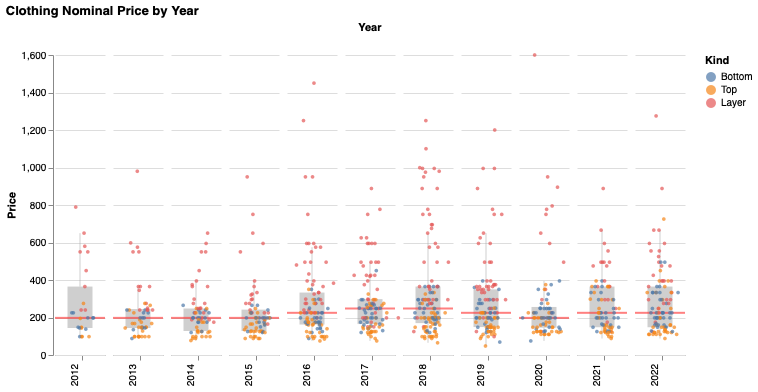

In [13]:
plots.price_plot(clothes_products_df, 'Kind', kind_sort_order).properties(title='Clothing Nominal Price by Year')

Aggregate prices for tops have fluctuated a bit in the last 6 years. In 2022, the median top price was `$148`, which is lower than it was in most of the last 6 years.

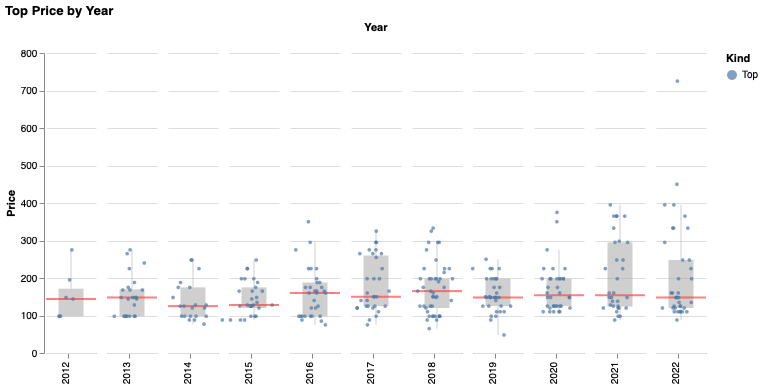

In [14]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Top'], 
                 'Kind', 
                 kind_sort_order).properties(title='Top Price by Year')

Since 2016, the median price for bottoms has usually been `$225`, as it was again in 2022.

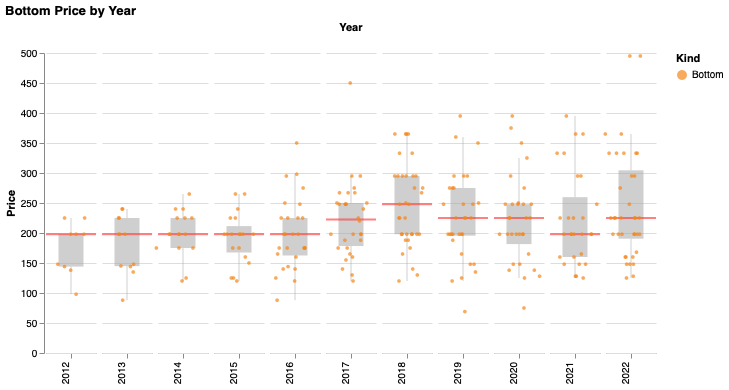

In [15]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Bottom'], 
                 'Kind', 
                 kind_sort_order,
                 color_scale=alt.Scale(range=['#f58518'])).properties(title='Bottom Price by Year')

Layers had a median price of `$395` in 2022, and in the last 6 years, only 2019's `$365`was  substantially cheaper.

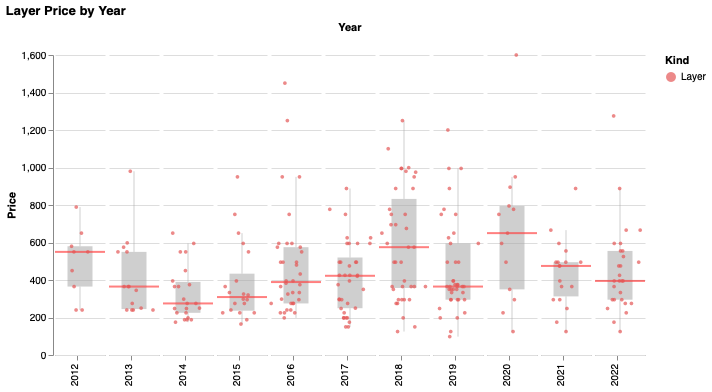

In [16]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Layer'], 
                 'Kind', 
                 kind_sort_order,
                 color_scale=alt.Scale(range=['#e45756'])).properties(title='Layer Price by Year')

If we slice the data differently and look at just experiments, we see that the median price of all experiments in 2022 was `$333`, the same as in 2018, and higher than typical for the last 6 years. Only 2021 had a higher aggregate experiment price.

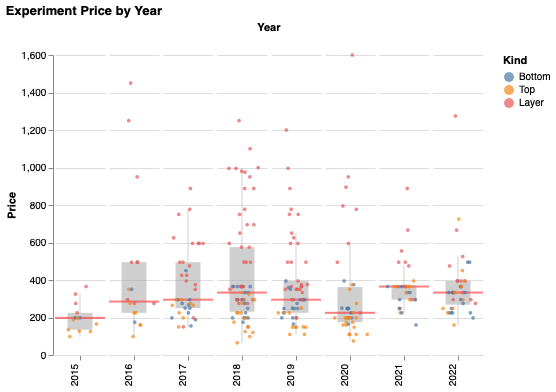

In [17]:
plots.price_plot(df_clothes[(df_clothes['Exp'] == True) & 
                            (df_clothes['Release'].dt.year > 2014)],
                 'Kind', 
                 kind_sort_order).properties(title='Experiment Price by Year')

## Inflation-adjusted prices

The plots in the previous section used nominal prices, and nominal dollars is certainly one way to think about money, but it is a bit problematic when comparing prices over multiple years due to changes in purchasing power. 

They following plots are the same as the ones above, except that the prices are adjusted for inflation using data from the [St. Louis Fed](https://fred.stlouisfed.org/series/PCEPILFE).

Viewed through this lens, Outlier clothes are less expensive now than they typically have been in the past (e.g., SDs purchased in 2012 would cost about $250 in 2022 dollars). Despite the need to pay for shipping, some items are probably less expensive now than they were even just a few years ago.

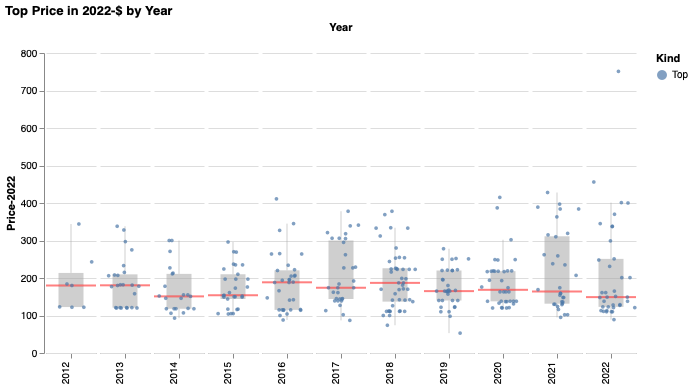

In [18]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Top'], 
                 'Kind', 
                 kind_sort_order, f"Price-{year}").properties(
                 title=f"Top Price in {year}-$ by Year")

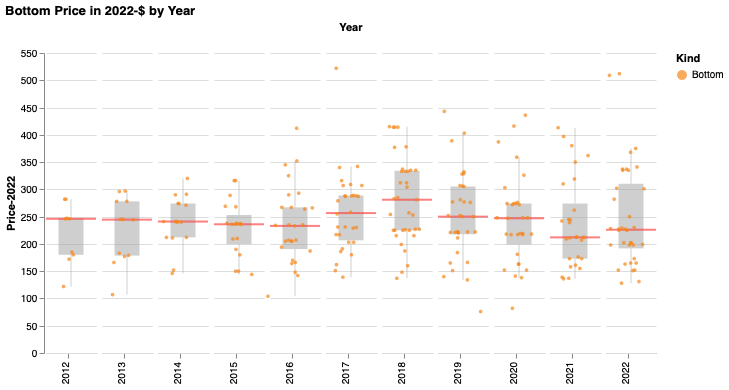

In [19]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Bottom'], 
                 'Kind', 
                 kind_sort_order, f"Price-{year}",
                 color_scale=alt.Scale(range=['#f58518'])).properties(
                 title=f"Bottom Price in {year}-$ by Year")

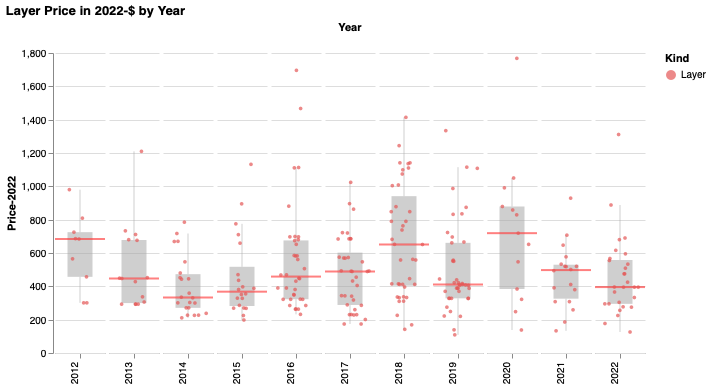

In [20]:
plots.price_plot(clothes_products_df[clothes_products_df['Kind'] == 'Layer'], 
                 'Kind', 
                 kind_sort_order, f"Price-{year}",
                 color_scale=alt.Scale(range=['#e45756'])).properties(
                 title=f"Layer Price in {year}-$ by Year")

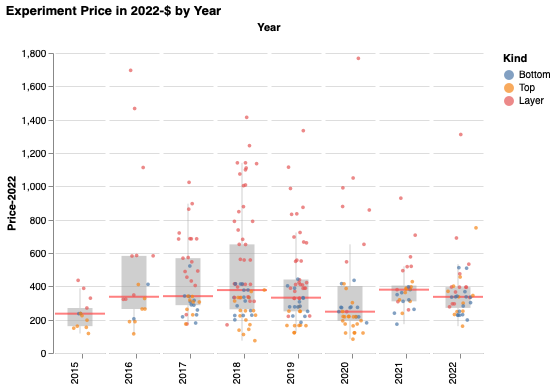

In [21]:
plots.price_plot(df_clothes[(df_clothes['Exp'] == True) & 
                            (df_clothes['Release'].dt.year > 2014)],
                 'Kind', 
                 kind_sort_order, f"Price-{year}").properties(
                 title=f"Experiment Price in {year}-$ by Year")

# Reups

Outlier's product catalog includes a lot of one-off experiments exploring a certain style idea or fabric, but the core of the product catalog is occupied by the products that are dropped multiple times, _the reups_.

Looking at just reupped products gives us better insight into this core, since some developments there may not be the same as elsewhere.

In [22]:
reups = []
index = []
for name, tdf in df_clothes.groupby("Product"):
    drops = tdf.groupby('Year').count()['Release']
    cat = tdf['Type'].iloc[0]
    kind = tdf['Kind'].iloc[0]

    # Products dropped in 2012 - 2013
    if drops.loc[2012:2013].sum() > 0 and tdf['MWU'].iloc[0] != 'Women':
        index.append((kind, cat, name))
        reups.append(drops)
        continue
    # Add layers by default
    if kind == 'Layer' and tdf['MWU'].iloc[0] != 'Women':
        index.append((kind, cat, name))
        reups.append(drops)
        continue        
    # Products dropped in at least 3 times since 2014
    if drops.loc[2014:year].sum() > 2:
        index.append((kind, cat, name))
        reups.append(drops)
        continue
    # Products dropped at least 2 times in the last three years
    if drops.loc[2019:year].sum() > 1:
        index.append((kind, cat, name))
        reups.append(drops)
        continue
reups_df = pd.DataFrame(reups, index=pd.MultiIndex.from_tuples(index, names=['Kind', 'Type', 'Product']))
reups_df = reups_df.sort_index().sort_index(axis=1)
# reups_df.head()

## Price changes

In [23]:
reupped_products_df = all_products_df[all_products_df['Product'].isin(reups_df.index.levels[2])]

recent_reupped_df = reupped_products_df[['Type', 'Year', 'Product', 'Price']]
recent_reupped_df = recent_reupped_df.groupby(['Type', 'Product', 'Year']).max().unstack()['Price']
recent_reupped_df = recent_reupped_df[[2018, 2019, 2020, 2021, 2022]].dropna(axis=0, thresh=2).dropna(axis=0, subset=[2022])

In [24]:
Markdown(f"In 2022, {len(recent_reupped_df)} products were released that were reups of drops since 2018.")

In 2022, 49 products were released that were reups of drops since 2018.

In [25]:
more_expensive_df = recent_reupped_df[recent_reupped_df[2022] > recent_reupped_df.median(axis=1)]
Markdown(f"{len(more_expensive_df)} were more expensive in 2022 than in the past.")

13 were more expensive in 2022 than in the past.

In [26]:
more_expensive_df.fillna("")

Year                                    2018   2019   2020   2021   2022
Type      Product                                                       
Blazer    Injex Blazer                 650.0         650.0         666.0
Outerwear Injex Shank                                495.0         555.0
          Ultra Ultra Nice Jacket             365.0                595.0
Pants     Futuredarts                  198.0  148.0  148.0  148.0  160.0
          Futureslimworks              140.0  148.0  148.0  148.0  160.0
          Slim Dungarees               198.0  198.0  198.0  198.0  225.0
          Slim Dungarees (Long)        198.0  198.0         198.0  225.0
Shorts    Futurebigs                                 138.0  128.0  148.0
          New Way Longs                130.0  135.0  138.0         148.0
T-Shirt   New Earth Cotton GT                        110.0  110.0  148.0
          New Earth Cotton Longsleeve         148.0  125.0  125.0  148.0
          Ramielust Cut One T-Shirt    125.0  125.0  125.0  138.0  135.0
          Ultrafine Merino Longsleeve  140.0  140.0                148.0

In [27]:
same_price_df = recent_reupped_df[recent_reupped_df[2022] == recent_reupped_df.median(axis=1)]
Markdown(f"{len(same_price_df)} were the same price as in the past.")

27 were the same price as in the past.

In [28]:
same_price_df.fillna("")

Year                                         2018   2019   2020   2021   2022
Type      Product                                                            
Hoodie    Grid Linen Hoodie                                      175.0  175.0
Outerwear Duckcloth Shank                                 595.0  595.0  595.0
          Extrafleece Cropped Poncho                             248.0  248.0
          Extrafleece Raw Cut Poncho                             295.0  295.0
          Extrafleece Topcoat                                    888.0  888.0
Pants     Futurehighdarts                                        198.0  198.0
          Injected Linen Pants              198.0  198.0  198.0  198.0  198.0
          Injex Highdarts                                        198.0  198.0
          Nylistic Merino Highdarts                              295.0  295.0
          Nylistic Merino Tensions                               365.0  365.0
          Strongdarts                       225.0  225.0  198.0  198.0  198.0
Poncho    Beach Thing                       125.0  125.0  125.0  125.0  125.0
Shirt     Cash Injection Popover                                 395.0  395.0
          Injex Popover                     198.0         225.0         198.0
          Ramienorth Boxford                              148.0  148.0  148.0
          Ramienorth Shortsleeve                          125.0  128.0  125.0
Shorts    Injex Baggies                     165.0                160.0  160.0
          New Way Five Fives                              125.0  125.0  125.0
          New Way Shorts                    120.0  125.0  128.0  128.0  128.0
          OG Free Ways                      188.0  225.0  225.0  225.0  225.0
T-Shirt   Cottonweight Billboard                          160.0  160.0  160.0
          Cottonweight Cut Two              125.0  125.0  125.0  125.0  125.0
          Dreamweight Raw Cut Shortsleeve                 110.0   88.0   88.0
          New Earth Cotton Billboard                             160.0  160.0
          Ramielust Cut Two T-Shirt                       125.0  138.0  135.0
          Ultrafine Merino Cut One T-Shirt  110.0  110.0  120.0  120.0  120.0
          Ultrafine Merino Cut Two T-Shirt                120.0  120.0  120.0

In [29]:
cheaper_df = recent_reupped_df[recent_reupped_df[2022] < recent_reupped_df.median(axis=1)]
Markdown(f"{len(cheaper_df)} were the less expensive price as than in the past.")

9 were the less expensive price as than in the past.

In [30]:
cheaper_df.fillna("")

Year                                       2018   2019   2020   2021   2022
Type      Product                                                          
Hoodie    Warmform Hoodie                        350.0         295.0  275.0
Outerwear Futurecore Trackjacket                               475.0  425.0
          Futurecore Warmshirt                                 495.0  475.0
Pants     Bomb Dungarees                                225.0  225.0  198.0
          Bombworks                                            225.0  198.0
          Ramiefall Yes Pants                                  160.0  148.0
Shirt     Injex Raglan                                         365.0  333.0
Shorts    Ultra Ultra Easy Shorts         175.0  198.0  198.0         168.0
T-Shirt   Dreamweight Raw Cut Longsleeve  150.0  150.0  148.0  120.0  120.0

## Reupped counts

In 2021, Bomb Dungarees and Bombworks were the most reupped bottoms. In 2022, Slim Dungarees have returned to reclaim that throne along with Strongdarts; the Futureslimworks, Ramiefall Yes Pants, and Futureonethrees coming in behind. and Slim Dungarees as the most dropped bottoms.

The ranking drop of the bomb products is a bit surprising, given the Outlier team's love of the fabric and that the styling seems more current than the SDs, but that could be because the drop included a large number of units.


/Users/ciyer/Documents/projects/outlier/outlier/public/articles/2022-review/plots.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sums = src.groupby('Year').sum()
/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


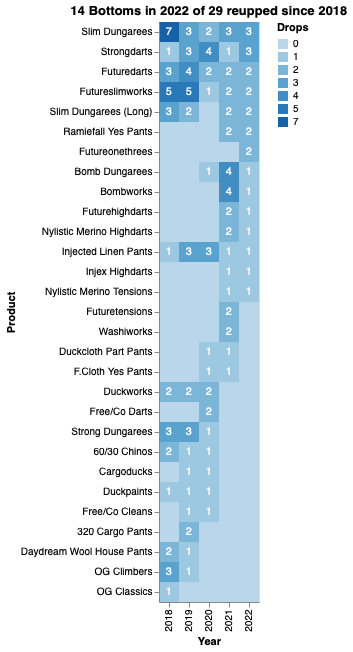

In [31]:
bottoms_df = reups_df.loc[('Bottom', 'Pants'), 2018:year].dropna(axis=0, how='all')
title_bottoms = "{} Bottoms in 2022 of {} reupped since 2018".format(len(bottoms_df.loc[:,2022].dropna()), len(bottoms_df))
plots.drop_chart(bottoms_df.sort_values(list(range(year, 2018, -1)), ascending=False)).properties(title=title_bottoms)

Only summer shrits got reupped in 2022.

/Users/ciyer/Documents/projects/outlier/outlier/public/articles/2022-review/plots.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sums = src.groupby('Year').sum()
/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


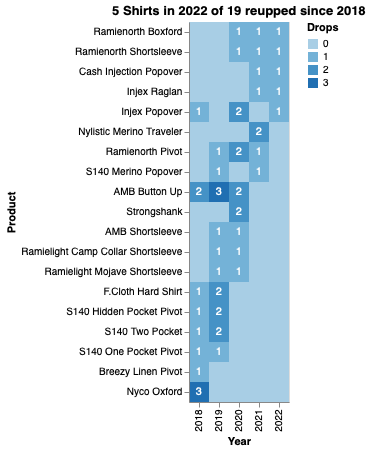

In [32]:
tops_df = reups_df.loc[('Top', 'Shirt'), 2018:year].dropna(axis=0, how='all')
title_tops = "{} Shirts in {} of {} reupped since 2018".format(len(tops_df.loc[:,year].dropna()), year, len(tops_df))
plots.drop_chart(tops_df.sort_values(list(range(year, 2018, -1)), ascending=False)).properties(title=title_tops)

In t-shirts, perennial favorite Ultrafine Merino t-shirts were reupped the most, followed somewhat surprisingly. by New Earth Cotton Longsleeve. Surprising, since pure cotton has not historically been the Outlier wheelhouse in the t-shirt domain, but there was a lot of it in 2022, though given [Abe's comments on New Earth Cotton](https://www.reddit.com/r/Outlier/comments/102dx05/2022_the_year_in_fabrics/), that is unlikely to continue.

/Users/ciyer/Documents/projects/outlier/outlier/public/articles/2022-review/plots.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sums = src.groupby('Year').sum()
/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


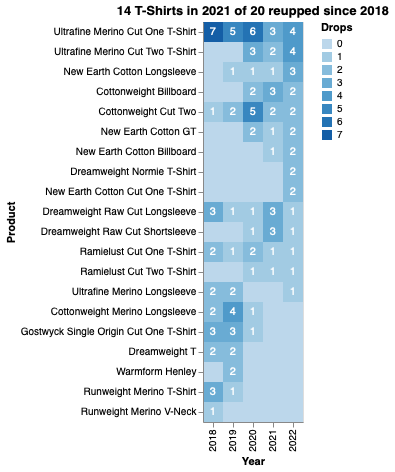

In [33]:
tops_df = reups_df.loc[('Top', 'T-Shirt'), 2018:year].dropna(axis=0, how='all')
title_tops = "{} T-Shirts in 2021 of {} reupped since 2018".format(len(tops_df.loc[:,year].dropna()), len(tops_df))
plots.drop_chart(tops_df.sort_values(list(range(year, 2018, -1)), ascending=False)).properties(title=title_tops)

# Colors

One of the biggest developments in Outlier over the last few years has been the scaling up in the number of colors. This manifests itself in two ways. One is just the sheer number of colors offered over the year. Though there is this trend in bottoms, they are slightly more conservative in this regard, but 2022 saw the second highest number of colors for tops.

In [34]:
def unique_color_counts(df):
    tdf = df.dropna(subset=["Colors"])
    colors = tdf['Colors'].str.split(",").values
    if len(colors) < 1:
        return 0
    return len(np.unique([c.strip() for c in np.concatenate(colors)]))


def colors_per_year_plot(df):
    tdf = df.groupby(['Product', 'Year']).apply(unique_color_counts).unstack()
    tdf = tdf.sort_values(year_sort, ascending=False)
    return plots.color_count_chart(tdf).properties(title="Number of unique colors per year")

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


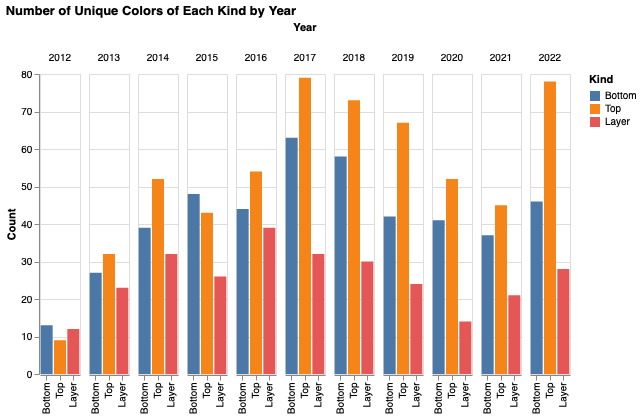

In [35]:
tdf = drops_to_clothes_drops(df_all).groupby(['Kind', 'Year']).apply(unique_color_counts).reset_index()
tdf.columns = ['Kind', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Kind:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Kind:N', sort=kind_sort_order),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title=f"Number of Unique Colors of Each Kind by Year")

The other manifestation of this trend is in the number of colors per drop. In 2022, drops contained on average the greatest variety of colors available for both tops and bottoms. Assuming this is also a proxy for the number of units in each drop, this would indicate that the drops in general include a greater number of units than they did in the past. This is also borne out anecdotally by the fact that many core products seem to stay in stock in a larger number of colors for longer. 

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


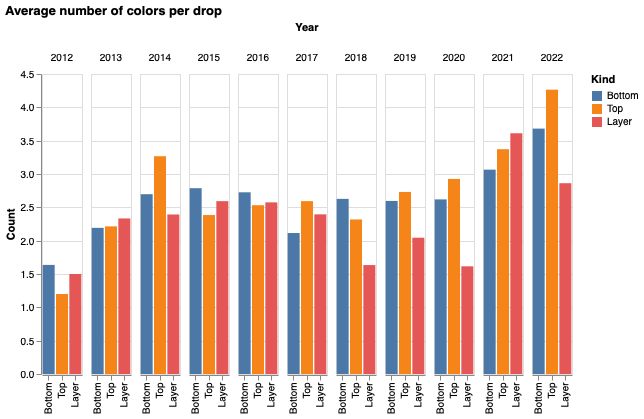

In [36]:
tdf = drops_to_clothes_drops(df_all).groupby(['Kind', 'Year', 'Product', 'Release']).apply(unique_color_counts)
tdf = tdf.groupby(['Kind', 'Year']).mean().reset_index()
tdf.columns = ['Kind', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Kind:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Kind:N', sort=kind_sort_order),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title=f"Average number of colors per drop")

## Color Detail

Just focusing on reupped products, how many colors dropped in each year?

### Bottoms

In [37]:
bottoms_df = reups_df.loc[('Bottom'), 2018:2021].dropna(axis=0, how='all')
bottoms_df = bottoms_df.loc[bottoms_df.sum(axis=1) > 3].reset_index(0, drop=True)

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


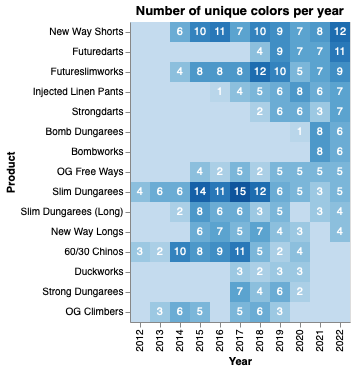

In [38]:
colors_per_year_plot(df_clothes[df_clothes['Product'].isin(bottoms_df.index)])

### Tops

In [39]:
tops_df = reups_df.loc[('Top'), 2018:2021].dropna(axis=0, how='all')
tops_df = tops_df.loc[tops_df.sum(axis=1) > 3].reset_index(0, drop=True)

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


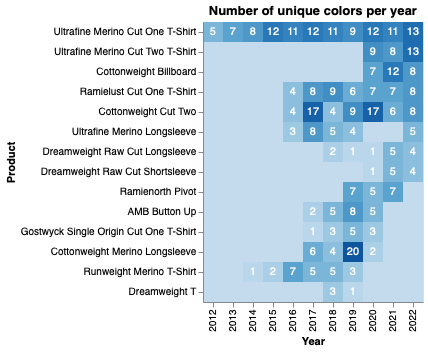

In [40]:
colors_per_year_plot(df_clothes[df_clothes['Product'].isin(tops_df.index)])

### Black is the color of my true love's... pants

Ever-versatile black is the most popular color, represented in 72% of drops. Sagebrush wins the title of unexpected break out, with its representation in 22% of all drops.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


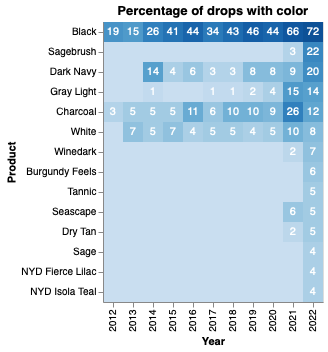

In [41]:
def unique_color_name_counts(df):
    tdf = df.dropna(subset=["Colors"])
    colors = tdf['Colors'].str.split(",").values
    if len(colors) < 1:
        return []
    colors = np.concatenate(colors)
    color_counts = {}
    for col in colors:
        c = col.strip()
        count = color_counts.get(c)
        if count is None:
            color_counts[c] = 1
        else:
            color_counts[c] = count + 1    
    return pd.DataFrame([{"color": k, "count":v} for k, v in color_counts.items()])


color_names_dfs = []
for year, gdf in df_clothes.groupby('Year'):
    tdf = unique_color_name_counts(gdf)
    tdf['count_per_drop'] = tdf['count'] / len(gdf)
    tdf['year'] = year
    color_names_dfs.append(tdf)
color_names_df = pd.concat(color_names_dfs)
color_names_df = color_names_df.set_index(['color', 'year'])

tdf = color_names_df['count_per_drop'].unstack()
tdf = tdf.sort_values(year, ascending=False)
tdf = tdf[tdf[year] > 0.045] * 100
tdf = tdf.fillna(0).astype("int8")
plots.color_count_chart(tdf).properties(title="Percentage of drops with color")

# Fabrics

To finish this year's review off, we close with fabrics.

The definitive source of information about Outlier's fabric palette are Abe's year in fabric summaries, which contain a mix of retrospective and forward guidance.

* [2021 Year in Fabrics](https://www.reddit.com/r/Outlier/comments/rxtve1/2021_the_year_in_fabrics/)
* [2022 Year in Fabrics](https://www.reddit.com/r/Outlier/comments/102dx05/2022_the_year_in_fabrics/)

34 different fabrics were used in clothes in 2022, which remains depressed compared to the pre-pandemic situation. In his 2022 review, Abe explains that the "textile innovation supply chain is seriously backed up" which could be an explanation for this.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


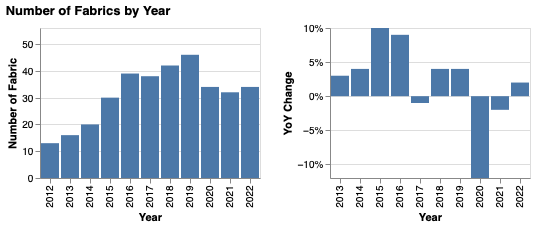

In [42]:
# Fix fabric names
clothes_products_df.loc[clothes_products_df['Fabric'] == 'FU/Cotton Jersey', 'Fabric'] = 'New Earth Cotton'
# clothes_products_df.loc[clothes_products_df['Fabric'] == 'LA Apparel Cotton', 'Fabric'] = 'Cotton'
fabrics_df = clothes_products_df.groupby(['Fabric', 'Year']).count()['Release'].unstack()
# fabrics_df.head()

fabrics_year_df = pd.DataFrame(fabrics_df.stack().reset_index().groupby('Year').count()['Fabric'])
plots.plot_with_yoy(fabrics_year_df, 'Fabric', 'Fabric').properties(title='Number of Fabrics by Year')

At the top of the list of fabrics used in just a few products are _Acottontwill_, _Daybreak Merino_, and _Sportweight Merino_. Based on Abe's comments, it sounds like Outlier is starting to experiment with these, but there is potential for them all to go bigger. The same goes for _Acottonflannel_. _Adenselinen_ will get another shot, but looks like it will most likely not make the cut.

Polartec Alpha (included in Futurecore) seems to be part of the core for many layers, though the exact face fabric and weight is still an area of exploration.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


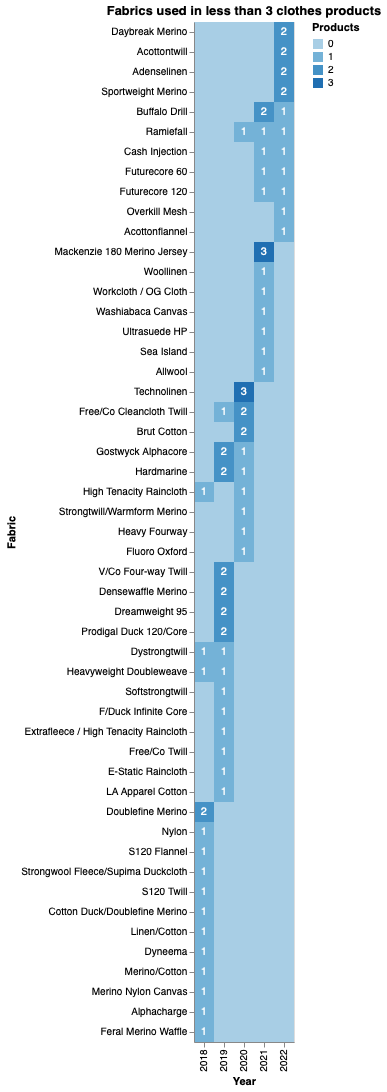

In [43]:
fdf = fabrics_df.loc[:,2018:year]
fabrics_cum_ser = fdf.sum(axis=1).sort_values(ascending=False)
fabrics_cum_ser = fabrics_cum_ser[fabrics_cum_ser > 0]
fabric_partition = fabrics_cum_ser.describe()
lower_50_ser = fabrics_cum_ser[fabrics_cum_ser <= fabric_partition.loc['50%']]
lower_50_fabrics = lower_50_ser.index
plots.fabric_chart(fdf.loc[lower_50_fabrics].sort_values(recent_year_sort, ascending=False)).properties(title="Fabrics used in less than 3 clothes products")

For the more heavily used fabrics, _Injected Linen_ is the blowout leader in terms of number of products. Abe hinted at this in his 2021 write up, dubbing it "the king of summer." Based on his 2022 comments, it sounds like we will see a repeat performance in 2023.

_F.Cloth_ and _Bombtwill_ retain their positions in the core stable, something that will probably continue for 2023. And indications are that _Hard/Co_ will continue to play a key role in experimental layers.

Personally, _New Earth Cotton_ was an eye-opener for me. After discovering the joys of merino though Outlier, cotton base layers became summer-only for me, but the beefy _New Earth Cotton_ helped me rediscover the utility of that fabric. Sounds like its days are numbered, though, which is a slight disappointment for me, though I am interested to see what takes its place.

/opt/homebrew/Caskroom/miniconda/base/envs/outlier/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


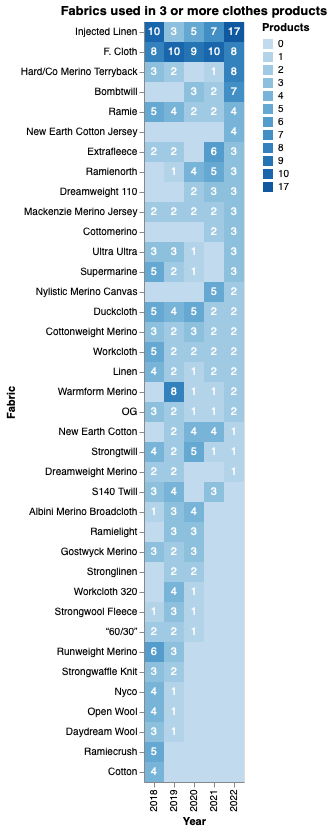

In [44]:
upper_50_ser = fabrics_cum_ser[fabrics_cum_ser > fabric_partition.loc['50%']]
upper_50_ser = upper_50_ser[upper_50_ser > 0]
upper_50_fabrics = upper_50_ser.index

plots.fabric_chart(fdf.loc[upper_50_fabrics].sort_values(recent_year_sort, ascending=False)).properties(title="Fabrics used in 3 or more clothes products")

# 2023

That's all the charts for 2022. I look forward to see what develops in 2023.

Thanks to [iFight4Pi](https://www.reddit.com/user/iFight4Pi/) for his helpful comments and suggestions!